In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import time
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import HTML

In [2]:
def f(x):
    """
    f(x) = x^2, but has a bump near zero. 
    Takes x in [0,1) and yields an x in [0,1).
    """
    if x>.1:
        return x*x
    else:
        return np.square(x/.1-1)

# setting up data arrays
x_init =  np.random.random() # seed value
domain = np.arange(0,1, .01)
iter_num = np.array([0])
orbit_val = np.array([x_init])

# iterating the function
for i in range(1,100):
    iter_num = np.append(iter_num, i)
    orbit_val = np.append(orbit_val, f(orbit_val[i-1]))

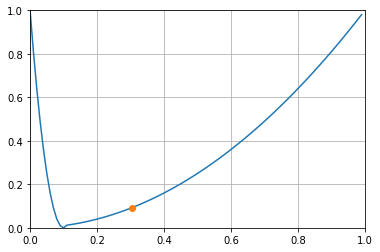

In [3]:
fig, ax = plt.subplots()
fig.set_tight_layout(False)

ax.set_xlim(0, 1)
ax.set_ylim(0,1)
ax.grid(True)

ax.plot(domain, np.array([f(x) for x in domain]))
orbit_point, = ax.plot(x_init, orbit_val[1], 'o')

def update(i):
    label = 'iteration {0}'.format(i)
    orbit_point.set_xdata(orbit_val[i])
    orbit_point.set_ydata(orbit_val[i+1])
    ax.set_xlabel(label)
    return orbit_point, ax

In [4]:
rc('animation', html='html5')

In [5]:
anim = FuncAnimation(fig, update, frames = np.arange(0,99), interval=400)
#anim.save('surgery_x_sq_dynamics.gif', dpi=80)
#plt.show()

In [6]:
HTML(anim.to_html5_video())